<h1 style="text-align:center">ISAT 480 Data Science and Machine Learning</h1>
<img src = "images/machine_learning.jpg" style = "align:center;width:300px;height:200px;">
<h2 style = "text-align:center">Final Exam Project -  Machine Learning Confidential Sensor Data</h2>
<h4 style = "text-align:center">Chris Byron & Truvell Wilson</h4>

<h3>Objectives</h3>

<p>To demonstrate the ability to complete an end-to-end data science / machine learning project using real-world data by following and implementing the main machine learning checklist steps that lead to a solution, namely:</p> 

<ul>
    <li>Frame the problem and look at the big picture</li>
    <li>Get the data</li>
    <li>Explore the data to gain insights</li>
    <li>Prepare the data to expose the underlying data patterns to Machine Learning Algorithms</li>
    <li>Explore many different methods and short-list the best ones</li>
    <li>Fine tune your models and combine them into a great solution</li>
    <li>Present your solution</li>
    <li>Launch, monitor, and maintain your system</li>
</ul>

<h3 style = "color:red">Frame the Problem</h3>

<img src = "images/sensor_array.jpg" style = "align:center;width:400px;height:200px">

<h3>Sensor the Data</h3>

<p>The data source as well as the exact nature of the data is confidential. Each data instance contains 12 real-valued input attributes. Each input attribute represents a sensor designed to detect the presence of one of two groups of substances. As an alternative, the sensorreadings may represent a 'false alarm'.</p>

<ul>
    <li>Substance 1 is represented by the value "one" in the class attribute column</li>
    <li>Substance 2 is represented by the value "two" in the class attribute column</li>
    <li>Substance 3 is represented by the value "three" in the class attribute column</li>
</ul>

<p>The problem is framed as a <strong>supervised learning</strong> problem: Predict the class of a substance from sensor data using the givenmeasurements in the dataset.</p>


<h3 style = "color:red;text-align:center;">Project Analysis</h3>

In [3]:
#import necessary packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)

<h3 style = "color:green;text-align:center">Exploratory Data Analysis</h3>

<p><strong>1) TO DO: Use pandas to load your data into your dataframe.</strong></p>
<p>Display first ten rows after you load the data.</p>

In [4]:
df = pd.read_csv('Sensor_Data_Confidential_341Project_DataSet7.csv')

df.head(10)

Input 1  Input 2  Input 3   Input 4  Input 5  Input 6  Input 7  Input 8  \
0    4.406   0.6116    5.691     5.906    1.763    2.726   0.9607   0.6055   
1    4.680   0.5322    5.461     5.923    1.589    2.799   0.9937   0.6250   
2    4.738   0.5298    5.680     5.916    1.844    2.798   1.0280   0.6238   
3    4.503   0.5273    5.703 -9999.000    1.711    2.856   1.1500   0.6201   
4    4.744   0.5884    5.532     5.911    1.792    2.886   1.0310   0.5627   
5    4.524   0.6311    5.773     5.822    1.803    2.800   1.0490   0.6836   
6    4.570   0.4834    5.804     5.887    1.708    2.894   1.0830   0.4919   
7    4.489   0.5054    5.790     5.900    1.849    2.919   0.9082   0.6055   
8    4.503   0.6091    5.686     5.892    1.714    2.822   1.0300   0.6079   
9    4.425   0.6091    5.732     5.912    1.793    2.726   1.0950   0.6104   

   Input 9  Input 10   Input 11   Input 12 class  
0    1.859      5.083      5.503    0.7544   one  
1    1.821      5.099      5.601    0.9546   one  
2    1.759      5.127      5.535    0.7275   one  
3    1.736      5.094      5.452    0.7690   one  
4    1.868      4.989      5.382    0.6665   one  
5    1.885      5.100      5.479    0.6958   one  
6    1.807      5.062      5.336    0.8447   one  
7    1.809      5.216      5.555    0.6897   one  
8    1.840      5.001      5.360    0.9521   one  
9    1.749      5.020      5.514    0.8081   one

<p><strong>2) TO DO:  Use the dataframe describe method dataframe.describe() to display some summarystatistics.</strong></p>

In [5]:
df.describe()

Input 1      Input 2      Input 3      Input 4      Input 5  \
count  1666.000000  1666.000000  1666.000000  1666.000000  1666.000000   
mean   -134.420804  -118.114677  -109.102194   -91.399119  -125.040359   
std    1167.492978  1089.498394  1062.557232   975.926752  1115.959694   
min   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
25%       3.018500     0.820300     4.783250     3.479500     0.408900   
50%       4.073000     1.522500     5.340500     5.094500     0.795300   
75%       4.508000     3.122250     5.599000     5.649000     1.461250   
max       5.105000     4.675000     5.944000     6.011000     2.571000   

           Input 6      Input 7      Input 8      Input 9    Input 10   \
count  1666.000000  1666.000000  1666.000000  1666.000000  1666.000000   
mean   -130.537302   -77.319851  -125.663162   -95.131987   -75.160382   
std    1141.932576   880.138338  1115.889116   975.558523   880.331222   
min   -9999.000000 -9999.000000 -9999.000000 -9999.000000 -9999.000000   
25%       0.600275     0.278300     0.181900     0.394000     1.420000   
50%       1.578000     0.523100     0.300300     0.728750     2.192000   
75%       2.177750     0.965600     0.504475     1.233000     4.968000   
max       3.638000     2.446000     1.199000     2.278000     5.312000   

         Input 11      Input 12  
count  1666.000000  1666.000000  
mean    -88.122777   -63.045762  
std     944.963450   810.287385  
min   -9999.000000 -9999.000000  
25%       1.130000     0.764200  
50%       1.345000     1.029000  
75%       1.907500     5.337750  
max       5.640000     5.825000

<h3 style="color:red">Comments on above summary</h3>

<p><em>Examine the data and note that when a sensor temporarily goes offline, it records a BAD data value of -9999.</em> This can be seen in theminimum recorded values for each sensor. Before we continue our preliminary data analysis, this bad data must be removed.</p>

<p>You should also take note of the <strong>count, mean, standard deviation</strong> and the <strong>maximum</strong> data values for each sensor. The bad data value recordings when the senors go offline have a large impact on these simple descriptive statistical summaries. Also, the wide range of thedata values will require some sort of scaling of the data before training a machine learing model.</p>

<p>Finally, the class labels are not numeric but are strings ('one', 'two' and 'three') that we call categorical class labels. We will need toconvert them to integers before we feed them to a classifier.</p>

<h3 style = "color:green">Data Cleansing</h3>

<p><strong>3) TO DO: Display the shape of your dataframe in the cell below</strong></p>

In [6]:
df.shape

(1666, 13)

<p><strong>4) TO DO: Use Pandas dataframe to find bad or missing data</strong></p>

<p>The bad data can be located and replaced using pandas and numpy. In the cell below, use code to find and replace the bad data (-9999 values) with numpy nan values (nan means <em>not a number</em>). Then use the dataframe to drop the rows with the nan signatures. This maysignificantly reduce your dataset size so you should display the shape of the data to see its new size. Also, again, display the first tenrows of the data with the dataframe.</p>

<ul>
    <li><strong>Enter the code in the cell below to implement the drop, replace and display</strong></li>
    <li><strong>Enter your code in the cell immediately following the output of the dataframe to show the new shape of the data in the dataframe.</strong></li>
</ul>

In [7]:
data = df.replace(-9999,np.nan).dropna(how = 'any')

data.head(10)

Input 1  Input 2  Input 3  Input 4  Input 5  Input 6  Input 7  Input 8  \
0     4.406   0.6116    5.691    5.906    1.763    2.726   0.9607   0.6055   
1     4.680   0.5322    5.461    5.923    1.589    2.799   0.9937   0.6250   
2     4.738   0.5298    5.680    5.916    1.844    2.798   1.0280   0.6238   
4     4.744   0.5884    5.532    5.911    1.792    2.886   1.0310   0.5627   
5     4.524   0.6311    5.773    5.822    1.803    2.800   1.0490   0.6836   
6     4.570   0.4834    5.804    5.887    1.708    2.894   1.0830   0.4919   
7     4.489   0.5054    5.790    5.900    1.849    2.919   0.9082   0.6055   
8     4.503   0.6091    5.686    5.892    1.714    2.822   1.0300   0.6079   
9     4.425   0.6091    5.732    5.912    1.793    2.726   1.0950   0.6104   
10    4.534   0.6287    5.411    5.896    1.760    3.008   1.1160   0.6116   

    Input 9  Input 10   Input 11   Input 12 class  
0     1.859      5.083      5.503    0.7544   one  
1     1.821      5.099      5.601    0.9546   one  
2     1.759      5.127      5.535    0.7275   one  
4     1.868      4.989      5.382    0.6665   one  
5     1.885      5.100      5.479    0.6958   one  
6     1.807      5.062      5.336    0.8447   one  
7     1.809      5.216      5.555    0.6897   one  
8     1.840      5.001      5.360    0.9521   one  
9     1.749      5.020      5.514    0.8081   one  
10    1.854      4.971      5.503    0.7507   one

In [8]:
#Shape of the data after the cleaning
data.shape

(1463, 13)

<p><strong>5) TO DO: Use pandas correlation method to find the two features (inputs) with the highestcorrelation</strong></p>

<p>Enter your answers in the cell immediately following the output correlation table</p>

In [9]:
data.corr()

Input 1   Input 2   Input 3   Input 4   Input 5   Input 6  \
Input 1    1.000000 -0.572129  0.939954  0.950208  0.775150  0.894622   
Input 2   -0.572129  1.000000 -0.523798 -0.542286 -0.474648 -0.662293   
Input 3    0.939954 -0.523798  1.000000  0.893738  0.667783  0.823420   
Input 4    0.950208 -0.542286  0.893738  1.000000  0.817663  0.877718   
Input 5    0.775150 -0.474648  0.667783  0.817663  1.000000  0.870063   
Input 6    0.894622 -0.662293  0.823420  0.877718  0.870063  1.000000   
Input 7    0.700969 -0.468049  0.598575  0.728996  0.926586  0.780521   
Input 8    0.687356 -0.488811  0.588904  0.727916  0.917741  0.775963   
Input 9    0.773260 -0.502784  0.676809  0.826244  0.977178  0.878146   
Input 10   0.730804 -0.469200  0.639960  0.795714  0.891651  0.829034   
Input 11   0.486260 -0.376060  0.422647  0.534825  0.693503  0.689591   
Input 12  -0.425539  0.135722 -0.407844 -0.367517 -0.346663 -0.418134   

            Input 7   Input 8   Input 9  Input 10   Input 11   Input 12  
Input 1    0.700969  0.687356  0.773260   0.730804   0.486260 -0.425539  
Input 2   -0.468049 -0.488811 -0.502784  -0.469200  -0.376060  0.135722  
Input 3    0.598575  0.588904  0.676809   0.639960   0.422647 -0.407844  
Input 4    0.728996  0.727916  0.826244   0.795714   0.534825 -0.367517  
Input 5    0.926586  0.917741  0.977178   0.891651   0.693503 -0.346663  
Input 6    0.780521  0.775963  0.878146   0.829034   0.689591 -0.418134  
Input 7    1.000000  0.954663  0.881863   0.818400   0.524209 -0.435386  
Input 8    0.954663  1.000000  0.882597   0.812763   0.538514 -0.399113  
Input 9    0.881863  0.882597  1.000000   0.894913   0.754854 -0.288443  
Input 10   0.818400  0.812763  0.894913   1.000000   0.695695 -0.293095  
Input 11   0.524209  0.538514  0.754854   0.695695   1.000000 -0.011089  
Input 12  -0.435386 -0.399113 -0.288443  -0.293095  -0.011089  1.000000

<p>The greatest correlation as determined by the Pandas correlation method is between <em>Input 5</em> and <em>Input 9</em> with the value 0.977178</p>

<h3 style = "color:green">Data Visualization</h3>


<p><strong>6) TO DO: Plot bar charts using pandas dataframe (plot the mean value of the sensors)</strong></p>

Text(0.5, 1.0, 'Mean Values of the Sensors')

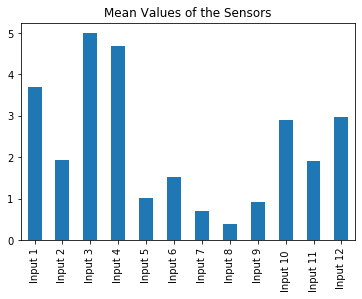

In [10]:
df_means = data.mean(axis=0)


df_means.plot.bar()
plt.title('Mean Values of the Sensors')

<h3 style = "color:green">Data Processing</h3>


<p><strong>7) TO DO: Create Feature Matrix and Target Vector</strong></p>

<p><strong>"Features"</strong> are also known as predictors, inputs, or attributes. The <strong>"response"</strong> is also known as the target, label, or output.</p>

<h4 style = "color:orange">Complete in cell below</h4>

In [11]:
y = data.iloc[:, 12].values     # The Target Vector
y.shape

(1463,)

In [12]:
X = data.iloc[:,[4,8]]          # The Feature Matrix
X.shape

(1463, 2)

<p><strong>8) TO DO: Convert the features dataframe to a NumPy array.</strong></p>

<h4 style = "color:orange">Complete in cell below</h4>

In [13]:
X = np.array(X)

<p><strong>9) TO DO: Label Encoding</strong></p>

<p>Transform the categorical labels into integers using the scikit-learn label encoder</p>

<h4>Enter your code in the cell below</h4>

In [14]:
np.where(y == 'one', 'one', 
         (np.where(y ==  'two', 'two', 'three')))

print('Class labels of y_train:', np.unique(y))

Class labels of y_train: ['one' 'three' 'two']


<p><strong>10) TO DO: Split the data into Training and Testing Sets</strong></p>

<p>Scikit learn contains a function called the <strong>train_test_split</strong> function that will randomly shuffle the dataset and then splits it into two datasets: a <strong>training set</strong> used to build the model and a <strong>test</strong> set to assess and evaluate how well the model works on unseen data (alsocalled out-of=sample data).</p>

<p><strong>Use a 80% / 20% train/test split for this project.</strong>

NOTE: You <strong>must</strong> use the encoded class labels in this part</p>

<h4>Enter your code in the cell below</h4>

In [15]:
from sklearn.model_selection import train_test_split

# test size = 0.2 means 20% of data
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123)

<p><strong>11) TO DO: Look at the shape of the data (rows and columns) after splitting it into training and testing sets</strong></p>

<h4>Enter your code in the next TWO cells below</h4>

In [16]:
print('The X training dataset shape is {}'.format(X_train.shape))

print('The y training dataset shape is {}'.format(y_train.shape))

The X training dataset shape is (1170, 2)
The y training dataset shape is (1170,)


In [17]:
print('The X test dataset shape is {}'.format(X_test.shape))

print('The y test dataset shape is {}'.format(y_test.shape))

The X test dataset shape is (293, 2)
The y test dataset shape is (293,)


<h3 style = "color:green">Scale the Data</h3>

<h3 style = "color:red">IMPORTANT: Standardizing the features:</h3>



<p>Standardization of datasets (feature scaling) is a common requirement for many machine learning and optimization algorithms implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data, i.e., Gaussian with zero mean and unit variance.</p>

<p><strong>12) TO DO: Let's use the StandarScaler from Scikit-learn to transform (scale) our feature</strong></p>

<h4>Enter your code in the cell below</h4>

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<h4>Comments on code above</h4>
<ul>
    <li>Using the preceding code, we loaded the StandardScaler class from the preprocessing module and initialized a new StandardScalerobject that we assigned to the variable sc.</li>
    <li>Using the fit method, StandardScaler estimated the parameters μ (sample mean) and  (standard deviation) for each featuredimension from the training data.</li>
    <li>By calling the transform method, we then standardized the training data using those estimated parameters μ and 𝜎.</li>
    <li>Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset arecomparable to each other.</li>
</ul>

<h4>IMPORTANT: So from this point forward you must use the scaled training and testing data</h4>

<h2 style = "color:green">Model Building</h2>

<h3>Train multiple Machine Learning models during same session. You will use the three algorithmsfrom previous labs.</h3>

<ol>
    <li>K-Nearest Neighbor (with K=10, K=100, K=200)</li>
    <li>Logistic Regression</li>
    <li>Linear Support Vector Classifier</li>
</ol>

<p>During the evaluation phase you must predict class member propbabilities and comment on what they mean.This means that scikit-learn’s linear support vector classifier cannot be used for those prodictions since this model does not have a method to predict classmembership probabilities, but like the other models, it does have the same predict method.</p>

<ul>
    <li>You MUST properly use model evaluation metrics (accuracy, confusion matrix, etc.)</li>
    <li>Two of your models (KNN and Logistic Regression MUST predict class membership probabilities and associated class label names</li>
</ul>

<h3 style = "color:green">Build a KNN Classification Model for K = 10, 100 and 200</h3>

<p><strong>13) TO DO: In the sections below you should build and train the actual machine learningmodel.</strong></p>

<p><strong>In the cell below: enter the code to import, instantiate, fit, predict and test the model's performance (accuracy) for the K-NearestNeighbor Model in SciKit-Learn for K= 10, 100 and 200.</strong> This should be completed in ONE cell using a loop, etc.</p>

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for k in [10,100,200]:
    knn = KNeighborsClassifier(n_neighbors=k)
    print(knn)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Model's Predictive Accuracy for k = {0} is:{1:0.2f}".format(k, metrics.accuracy_score(y_test, y_pred)))
    
    print("Test Accuracy (using knn.score()) for k = {0} is:{1:0.2f}".format(k, knn.score(X_test, y_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
Model's Predictive Accuracy for k = 10 is:0.83
Test Accuracy (using knn.score()) for k = 10 is:0.83
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')
Model's Predictive Accuracy for k = 100 is:0.79
Test Accuracy (using knn.score()) for k = 100 is:0.79
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=200, p=2,
                     weights='uniform')
Model's Predictive Accuracy for k = 200 is:0.70
Test Accuracy (using knn.score()) for k = 200 is:0.70


<h4>Predicting class-membership probabilites</h4>

<p>Scikit-Learn has a method that allows prediction of class member probabilities.</p>

<ul>
    <li>The probability that training examples belong to a certain class can be computed using the <strong>predict_proba</strong> method. For example, we can predict the probabilities of the first three samples in the test set as follows (NOTE: X_test_std[:3. :] means get the first 3 rows and the associated columns from the test dataset X_test):</li>
</ul>

<img src = "images/proba_eq.jpg" style = "align:center">

<p>In the cells below, your must predict the <strong>class-membership probabilities</strong> for each specified <strong>SINGLE ROW OF DATA</strong>. Also, you should recall that the label encoding that we implemented earlier resulted in the mapping:</p>

<p><strong>class membership label indices after encoding</strong></p>

<ul>
    <li>0 = 'one' (the Substance is Substance 1)</li>
    <li>1 = 'three' (false alarm)</li>
    <li>2 = 'two' (The Substance is Substance 2)</li>
</ul>

<p><strong>14) TO DO:class-membership probability</strong></p>

<p>Predict the class membership probability by using the a row with <strong>index = 10</strong> from the X_test_std data. Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.</p>

<p><strong>Enter your code in the cell below.</strong></p>

<h1>ISSUES BEGIN HERE!!@#@!#$!@#$!@#$!@#</h1>

In [20]:
#knn.predict_proba(X_test_std[10,:])
#print('The predicted class is {}'.format(knn.predict_proba(X_test_std[10,:]).reshape(1, -1)))
#print('The actual class is {}'.format(y_test[10].reshape(1,-1)))

<p><strong>15) TO DO:class-membership probability</strong></p>

<p>Predict the class membership probability by using the a row with <strong>index = 125</strong> from the X_test_std data. Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.</p>

<p><strong>Enter your code in the cell below.</strong></p>

In [21]:
print('The predicted class is {}'.format(knn.predict_proba(X_test_std[[125]])))
print('The actual class is {}'.format(y_test[125]))

The predicted class is [[1. 0. 0.]]
The actual class is two


<p><strong>16) TO DO:class-membership probability</strong></p>

<p>Predict the class membership probability by using the a row with <strong>index = 200</strong> from the X_test_std data. Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.</p>

<p><strong>Enter your code in the cell below.</strong></p>

In [22]:
print('The predicted class is {}'.format(knn.predict(X_test_std[[200]])))
print('The actual class is {}'.format(y_test[200]))

The predicted class is ['one']
The actual class is two


<h1>ISSUES ABOVE HERE!@#$!@#$!@#$!@#$!@$#</h1>

<h3 style = "color:green">Build Logistic Regression Model</h3>

<p><strong>17) TO DO: SciKit-learn Logistic Regression for this lab</strong></p>

<p><strong>Import and instantiate the Logistic Regression Model in SciKit-Learn is in the cell below</strong></p>

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg',
                       multi_class='multinomial',
                       random_state=0)

<p><strong>18) TO DO: Train the model by calling the model's fit function</strong></p>

<p>Now that the model has been instantiated (created) it still needs to be trained (fitted) to the training dataset. <strong>Enter your code below to fit the model to the training dataset</strong></p>

In [24]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

<p><strong>19) TO DO: Evaluate the Logistic Regression Model</strong></p>

<p>Use the test set to create the model's predictions. Name the prediction vector <strong>y_pred</strong> as in previous notebooks.</p>

<p><strong>Enter your code in the cell below:</strong></p>

In [25]:
y_pred = lr.predict(X_test)

<p><strong>20) TO DO: Evaluate the Logistic Regression Model's Performance</strong></p>

<p>Use SciKit Learn's built-in scoring method to evaluate the model's performance accuracy.</p>

<p><strong>Enter your code below:</strong></p>

In [26]:
print('\nTest set accuracy: {0:0.2f}%'.format(100*lr.score(X_test, y_test)))


Test set accuracy: 55.97%


<h3 style = "color:green">Predicting class-membership probabilities using the Logistic Regression Model</h3>

<p><strong>21) TO DO:class-membership probability</strong></p>

<p>Predict the class membership probability by using the a row with <strong>index = 10</strong> from the X_test_std data. Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.</p>

<p><strong>Enter your code in the cell below.</strong></p>

In [27]:
print('The class membership probabilites are: {}'.format(lr.predict_proba(X_test_std[[10]])))
print('The actual class membership is: {}'.format(y_test[10]))

The class membership probabilites are: [[0.54  0.011 0.45 ]]
The actual class membership is: two


<p><strong>22) TO DO:class-membership probability</strong></p>

<p>Predict the class membership probability by using the a row with <strong>index = 120</strong> from the X_test_std data. Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.</p>

<p><strong>Enter your code in the cell below.</strong></p>

In [28]:
print('The class membership probabilites are: {}'.format(lr.predict_proba(X_test_std[[120]])))
print('The actual class membership is: {}'.format(y_test[[120]]))

The class membership probabilites are: [[0.516 0.033 0.451]]
The actual class membership is: ['two']


<p><strong>23) TO DO:class-membership probability</strong></p>

<p>Predict the class membership probability by using the a row with <strong>index = 200</strong> from the X_test_std data. Make sure your print statement uses a complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.</p>

<p><strong>Enter your code in the cell below.</strong></p>

In [29]:
print('The class membership probabilites are: {}'.format(lr.predict_proba(X_test_std[[200]])))
print('The actual class membership is: {}'.format(y_test[[200]]))

The class membership probabilites are: [[0.499 0.018 0.484]]
The actual class membership is: ['two']


<h3 style = "color:green">Build Linear Support Vector Classifier Model </h3>

<p><strong>24) TO DO:scikit-learn Linear Support Vector Classifier for this lab</strong></p>

<p>Import and instantiate the Linear Support Vector Classifier Model in SciKit-Learn is in the cell below</p>

In [30]:
from sklearn.svm import LinearSVC

#instantiate the model and fit the data
lsvc = LinearSVC()

<p><strong></strong></p.

<p><strong>25) TO DO: Train the model by calling the model's fit function</strong></p>

<p>Now that the model has been instantiated (created) it still needs to be trained (fitted) to the training dataset. <strong>Enter your code below to fitthe model to the training dataset</strong></p>

In [31]:
lsvc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

<p><strong>26) TO DO: Evaluate the Linear Suport Vector Classifier Model</strong></p>

<p>Use the test set to create the model's predictions. Name the prediction vector <strong>y_pred</strong> as in previous notebooks.</p>

<p><strong>Enter your code in the cell below.</strong></p>

In [32]:
y_pred = lsvc.predict(X_test)
print('Test set predictions:\n {}'.format(y_pred))

Test set predictions:
 ['one' 'one' 'one' 'one' 'three' 'three' 'one' 'one' 'one' 'three' 'one'
 'one' 'one' 'one' 'one' 'one' 'one' 'one' 'one' 'one' 'one' 'three'
 'three' 'one' 'one' 'one' 'three' 'three' 'one' 'three' 'one' 'three'
 'one' 'one' 'three' 'one' 'one' 'one' 'three' 'three' 'three' 'two'
 'three' 'one' 'three' 'three' 'one' 'three' 'three' 'one' 'three' 'one'
 'one' 'one' 'one' 'one' 'three' 'one' 'one' 'one' 'one' 'one' 'one' 'one'
 'one' 'one' 'one' 'three' 'one' 'three' 'one' 'three' 'one' 'one' 'one'
 'one' 'one' 'one' 'three' 'three' 'one' 'one' 'three' 'one' 'three'
 'three' 'three' 'one' 'one' 'one' 'three' 'one' 'one' 'three' 'one'
 'three' 'three' 'one' 'one' 'three' 'one' 'three' 'one' 'three' 'one'
 'one' 'one' 'one' 'one' 'one' 'three' 'three' 'one' 'one' 'one' 'one'
 'one' 'three' 'three' 'one' 'one' 'one' 'one' 'one' 'one' 'one' 'one'
 'three' 'three' 'one' 'one' 'one' 'one' 'one' 'one' 'three' 'one' 'one'
 'one' 'one' 'three' 'one' 'one' 'one' 'one' 'thre

<p><strong>27) TO DO: Evaluate the Linear Suport Vector Model's Performance</strong></p>

<p>Use SciKit Learn's built-in scoring method to evaluate the model's performance accuracy.</p>

<p><strong>Enter your code in the cell below.</strong></p>

In [33]:
print('Test set score: {0:0.2f}'.format(lsvc.score(X_test, y_test)))

Test set score: 0.57


<p><strong>28) TO DO:  Using the Predict Method of the Linear Suport Vector Model</strong></p>

<p>Use SciKit Learn's built-in predict method to test the model's predictive performance for the first row of data in X_test_std</p>

<p><strong>Enter your code in the cell below.</strong></p>

In [34]:
y_pred_std = lsvc.predict(X_test_std[[1]])
print('Test set score: {0:0.2f}'.format(np.mean(y_pred_std==y_test)))

Test set score: 0.44


<p><strong>29) TO DO:Print the number of misclassifications using numpy</strong></p>

<p><strong>Enter your code in the cell below.</strong></p>

In [35]:
print('Number of missclassified samples = {}'.format(np.sum(y_pred_std != y_test)))

Number of missclassified samples = 164


<h3 style = "color:green">Confusion Matrix</h3>

<p>Supervised learner models are designed to classify, estimate, and/or predict future outcome. For some applications the desire is to build models showing consistently high predictive accuracy.</p>

<h4>Classification Correctness:</h4>

<p>Classification correctness is best calculated by presenting previously unseen data in the form of a test set to the model being evaluated. Test set model accuracy can be summarized in a table known as a confusion matrix. To illustrate, let’s suppose we have three possible classes: C1, C2, and C3. A generic confusion matrix for the three class case is shown in Table 1.</p>

<ul>
    <li>Values along the main diagonal give the total number of correct classifications for each class.</li>
    <li>Values other than those on the main diagonal represent classification errors.</li>
</ul>

<h4>Rules for the Three-Class Confusion Matrix</h4>

<ul>
    <li>Rule 1. Values along the main diagonal represent correct classifications. For the matrix in Table 1,the value C11 represents the total number of class C1 instances correctly classified by the model. A similar statement can be made for the values C22 and C33.</li>
    <li>Rule 2. Values in row Ci represent those instances that belong to class Ci. For example, with i = 2,the instances associated with cells C21, C22, and C23 are all actually members of C2. To find the total number of C2 instances incorrectly classified as members of another class, we compute the sum of C21 and C23.</li>
    <li>Rule 3. Values found in column Ci indicate those instances that have been classified as members of Ci. With i = 2,the instances associated with cells C12, C22, and C32 have been classified as members of class C2.To find the total number of instances incorrectly classified as members of class C2, we compute the sum of C12 and C32.</li>
</ul>

<img src = "images/table1.png">


<p><strong>30) TO DO: Compute the Confusion Matrix for the Linear Suport Vector Model</strong></p>

<p>Use SciKit Learn's metrics module to compute the model's confusion matrix.</p>

<p><strong>Enter your code below</strong></p>

In [36]:
from sklearn import metrics
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix
[[107  20   2]
 [ 15  59   0]
 [ 84   6   0]]


<p><strong>31) TO DO: Classification Correctness</strong></p>

<p>Based on the output of your confusion matrix, what was the total number of correct classifications of Substance 2?</p>

<p><strong>Enter your answer as markdown in the cell below:</strong></p>

<p>The number of correct classifications for <em>substance 2</em> is 59, represented by the second value in the main (central, from left to right) diagonal.</p>

<p><strong>32) TO DO: Compute the Classification report for Linear Suport Vector Model</strong></p>

<p>Use SciKit Learn's metrics module to compute the model's classification report.</p>

<p><strong>Enter your code below:</strong></p>

In [37]:
print('Classification Report')
print(metrics.classification_report(y_test, y_pred, target_names = ['Substance 1', 'Substance 2', 'Substance 3']))

Classification Report
              precision    recall  f1-score   support

 Substance 1       0.52      0.83      0.64       129
 Substance 2       0.69      0.80      0.74        74
 Substance 3       0.00      0.00      0.00        90

    accuracy                           0.57       293
   macro avg       0.40      0.54      0.46       293
weighted avg       0.40      0.57      0.47       293



<p><strong>33) TO DO: Classification Report</strong></p>

<p>Based on the output of your classification report, out of all the times Substance 1 should have been predicted, what percentage of times was it correctly predicted?</p>

<p><strong>Enter your answer as markdown in the cell below:</strong></p>

<p>The recall value can be defined as the ratio of correctly predicted positive observations to the all observations in the actual class. In other words, the ratio between the predicted value of positive results and the actual number of positive results. This value is 0.83 for substance 1. </p>

<h4 style = "color:purple">34) TO DO: Comparative Summary of Models Performance</h4>

<p><em>Give a brief comparative summary of your models and your analysis in the cell below.</em></p>

<p>*summary*</p>

<h3 style = "color:green">Serialization</h3>

<h4 style = "color:purple">35) TO DO: Model Persistence - Save/Load the trained classifier </h4>

<p>To receive full credit for this part you must test the saved and re-loaded classifiers on an instance of “unknown” data and show that it correctly classifies the instance. It’s ok if you use an instance (sample) that is from the test set as the “unknown” data.</p>

<h4 style = "color:purple">NOTE: Use either the Logistic Regression Model or the K-Nearest Neighbors Classifier for this part</h4>

<h3>Step1: Save the Model</h3>

<h4><strong>Pickle (serialize) and save the trained classifier to a folder</strong></h4>

<p><strong>Enter your code below:</strong></p>

In [41]:
# Serialization with Python's Pickle
import pickle
import os

# save the trained classifier to a folder
dest = os.path.join('lr', 'plr_objects')
if not os.path.exists(dest):
    os.makedirs(dest)
    
pickle.dump(lr, open(os.path.join(dest, 'classifier.plr'), 'wb'), protocol = 4)

<h3>Step2: Load the saved model</h3>

<h4><strong>Load the saved trained classifier into memory</strong></h4>

<p><strong>Enter your code below:</strong></p>

In [42]:
# Load the saved the trained classifier into memory
import pickle
import re
import os
os.chdir('lr')
classifier_reloaded = pickle.load(open(os.path.join('plr_objects', 'classifier.plr'), 'rb'))

<h3>Step3: Test the re-loaded model</h3>



<p>Use SciKit Learn's built-in predict method to test the re-loaded model on data from the row of data in X_test_std with index equal to six (6)</p>

<p><strong>Enter your code below:</strong></p>

In [47]:
print('The prediction from the reloaded model is {}'.format(classifier_reloaded.predict(X_test_std[[6]])))

The prediction from the reloaded model is ['two']
